# Sleep Stage Classification - Presentation Visualizations

This notebook generates presentation-ready diagrams for the mulEEG sleep stage classification evaluation results.

**Author:** Generated from evaluate_patients.py  
**Date:** 2026-02-16

## 1. Setup and Imports

In [3]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    cohen_kappa_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report
)

# Configure matplotlib for high-quality output
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✓ Imports completed successfully")

✓ Imports completed successfully


## 2. Load Evaluation Results

Load the results from the evaluation script.

In [4]:
# Import the evaluator
from evaluate_patients import PatientEvaluator

# Configuration
CHECKPOINT_PATH = "./weights/shhs/ours_diverse.pt"
OUTPUT_DIR = "./output"
DEVICE = "cpu"
RESULTS_DIR = "./results"
VIZ_DIR = "./visualizations"

# Create visualization directory
os.makedirs(VIZ_DIR, exist_ok=True)

print(f"Checkpoint: {CHECKPOINT_PATH}")
print(f"Data directory: {OUTPUT_DIR}")
print(f"Visualization output: {VIZ_DIR}")

Checkpoint: ./weights/shhs/ours_diverse.pt
Data directory: ./output
Visualization output: ./visualizations


In [5]:
# Initialize evaluator and run evaluation
print("Initializing evaluator...")
evaluator = PatientEvaluator(CHECKPOINT_PATH, OUTPUT_DIR, DEVICE)

print("\nRunning evaluation on all patients...")
df_results, all_y_true, all_y_pred = evaluator.evaluate_all_patients()

# Convert to numpy arrays
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

print(f"\n✓ Evaluation completed: {len(df_results)} patients, {len(all_y_true)} epochs")

Initializing evaluator...
Loading model from: ./weights/shhs/ours_diverse.pt
⚠️  WARNING: Linear layer weights not found in checkpoint!
⚠️  Using random initialization - predictions may be biased!
⚠️  Consider fine-tuning the linear layer first.
⚠️  Available checkpoint keys: ['eeg_model_state_dict']
Model loaded successfully on cpu

Running evaluation on all patients...

Found 35 patient folders

Processing 1/35: 00000358-159547


/home/nummm/Documents/CEPP/mulEEG/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)



  🔍 Debug Information (First Batch):
  Input shape: torch.Size([32, 1, 3000])
  Output logits shape: torch.Size([32, 5])

  Sample Logits (first 3 samples):
    Sample 0:
      Logits: [-0.35655907 -0.27854094 -0.16629839 -0.06219482  0.20442021]
      Probs:  [0.15660806 0.16931558 0.18942758 0.21021071 0.27443802]
      Pred:   4 (class with highest prob: 0.2744)
    Sample 1:
      Logits: [-0.35656184 -0.2785385  -0.16629153 -0.06218997  0.20442173]
      Probs:  [0.15660721 0.16931556 0.18942839 0.21021119 0.27443773]
      Pred:   4 (class with highest prob: 0.2744)
    Sample 2:
      Logits: [-0.35655898 -0.27854255 -0.16629589 -0.06219225  0.20442092]
      Probs:  [0.15660793 0.16931514 0.18942788 0.21021105 0.27443796]
      Pred:   4 (class with highest prob: 0.2744)

  Batch Statistics:
    Logits mean per class: [-0.35655862 -0.27854192 -0.1662962  -0.06219255  0.2044209 ]
    Logits std per class:  [7.1685560e-07 7.8623697e-07 1.4341816e-06 1.1270752e-06 2.1880513e-07]


/home/nummm/Documents/CEPP/mulEEG/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')



  🔍 Debug Information (First Batch):
  Input shape: torch.Size([3, 1, 3000])
  Output logits shape: torch.Size([3, 5])

  Sample Logits (first 3 samples):
    Sample 0:
      Logits: [-0.35656178 -0.27853915 -0.16629335 -0.06219089  0.20442212]
      Probs:  [0.15660729 0.1693155  0.18942814 0.21021107 0.27443793]
      Pred:   4 (class with highest prob: 0.2744)
    Sample 1:
      Logits: [-0.35655895 -0.27854264 -0.16629589 -0.06219234  0.20442119]
      Probs:  [0.15660793 0.16931511 0.18942788 0.21021102 0.27443802]
      Pred:   4 (class with highest prob: 0.2744)
    Sample 2:
      Logits: [-0.3565589  -0.278543   -0.16629598 -0.06219219  0.20442119]
      Probs:  [0.15660793 0.16931507 0.18942787 0.21021107 0.27443802]
      Pred:   4 (class with highest prob: 0.2744)

  Batch Statistics:
    Logits mean per class: [-0.35655987 -0.2785416  -0.16629507 -0.0621918   0.2044215 ]
    Logits std per class:  [1.6520812e-06 2.1239252e-06 1.4890230e-06 7.9499245e-07 5.3339772e-07]

 

## 3. Define Sleep Stage Labels and Colors

In [6]:
# Sleep stage definitions
STAGE_NAMES = ['Wake', 'N1', 'N2', 'N3', 'REM']
STAGE_LABELS = [0, 1, 2, 3, 4]
STAGE_COLORS = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Create color map
stage_color_map = dict(zip(STAGE_NAMES, STAGE_COLORS))

print("Sleep Stages:")
for name, color in stage_color_map.items():
    print(f"  {name}: {color}")

Sleep Stages:
  Wake: #FF6B6B
  N1: #4ECDC4
  N2: #45B7D1
  N3: #96CEB4
  REM: #FFEAA7


## 4. Visualization 1: Enhanced Confusion Matrix

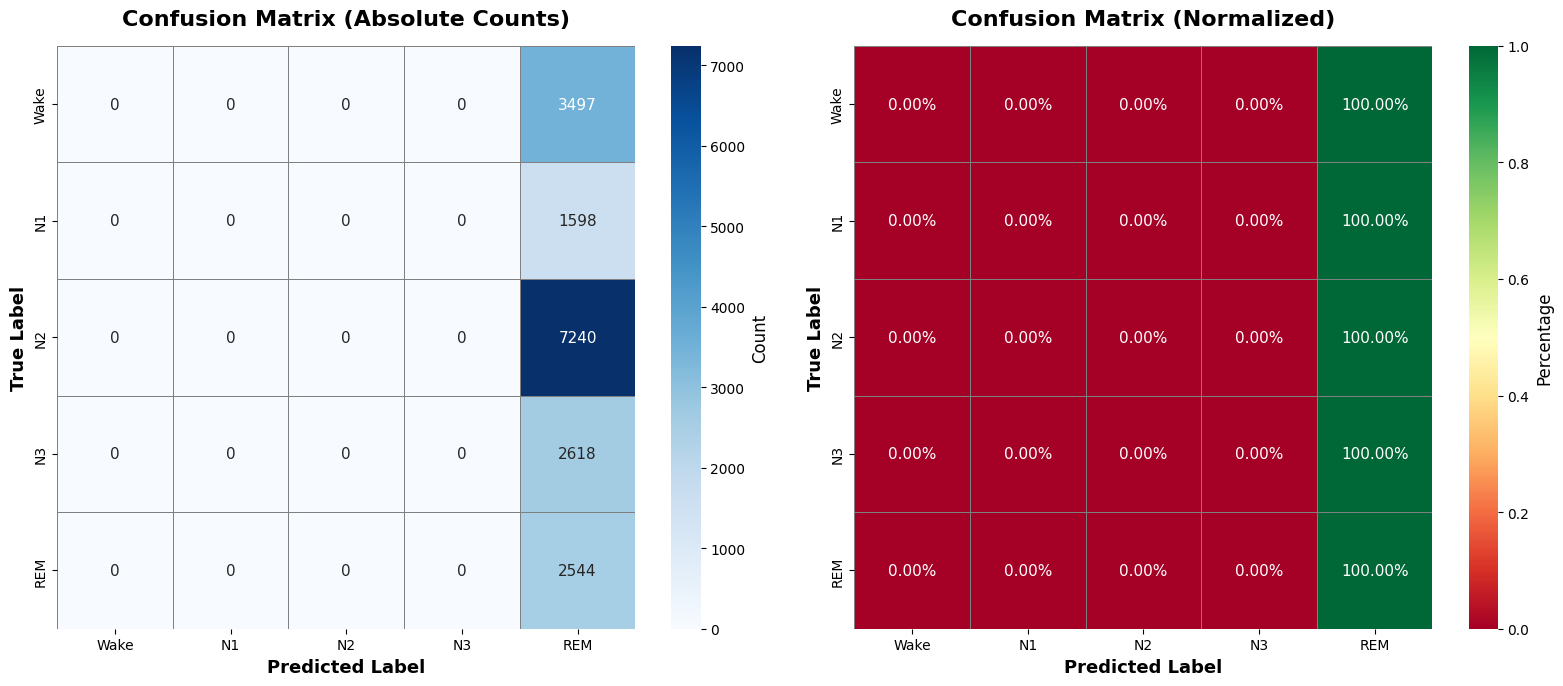

✓ Confusion matrix visualization saved


In [7]:
# Compute confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred, labels=STAGE_LABELS)

# Create figure with two subplots: absolute counts and normalized
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Absolute counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=STAGE_NAMES, yticklabels=STAGE_NAMES,
            cbar_kws={'label': 'Count'}, ax=axes[0],
            linewidths=0.5, linecolor='gray')
axes[0].set_title('Confusion Matrix (Absolute Counts)', fontsize=16, fontweight='bold', pad=15)
axes[0].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')

# Plot 2: Normalized (percentage)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn', 
            xticklabels=STAGE_NAMES, yticklabels=STAGE_NAMES,
            cbar_kws={'label': 'Percentage'}, ax=axes[1],
            linewidths=0.5, linecolor='gray', vmin=0, vmax=1)
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=16, fontweight='bold', pad=15)
axes[1].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{VIZ_DIR}/01_confusion_matrix.png', bbox_inches='tight')
plt.show()

print("✓ Confusion matrix visualization saved")

## 5. Visualization 2: Per-Class Performance Metrics

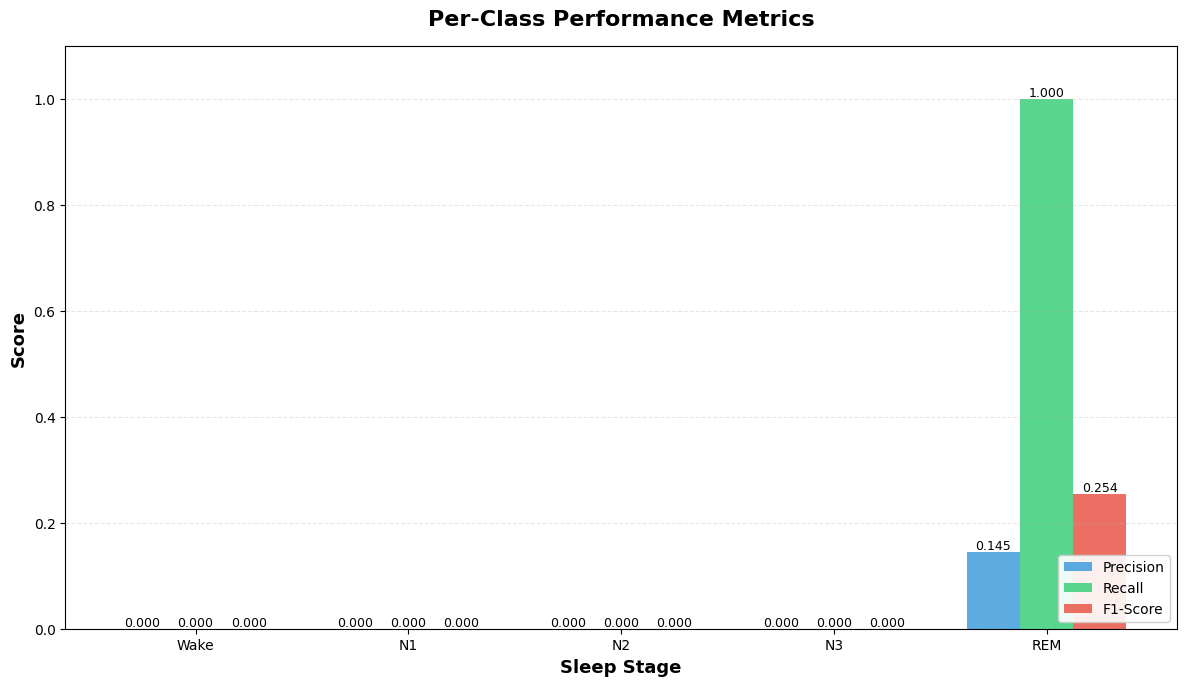

✓ Per-class metrics visualization saved

Per-Class Metrics:
Stage  Precision  Recall  F1-Score
 Wake   0.000000     0.0   0.00000
   N1   0.000000     0.0   0.00000
   N2   0.000000     0.0   0.00000
   N3   0.000000     0.0   0.00000
  REM   0.145396     1.0   0.25388


In [8]:
# Calculate per-class metrics
precision_per_class = precision_score(all_y_true, all_y_pred, average=None, labels=STAGE_LABELS, zero_division=0)
recall_per_class = recall_score(all_y_true, all_y_pred, average=None, labels=STAGE_LABELS, zero_division=0)
f1_per_class = f1_score(all_y_true, all_y_pred, average=None, labels=STAGE_LABELS, zero_division=0)

# Create DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Stage': STAGE_NAMES,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
})

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(STAGE_NAMES))
width = 0.25

bars1 = ax.bar(x - width, metrics_df['Precision'], width, label='Precision', color='#3498db', alpha=0.8)
bars2 = ax.bar(x, metrics_df['Recall'], width, label='Recall', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', color='#e74c3c', alpha=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

ax.set_xlabel('Sleep Stage', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Per-Class Performance Metrics', fontsize=16, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(STAGE_NAMES)
ax.legend(loc='lower right', framealpha=0.9)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(f'{VIZ_DIR}/02_per_class_metrics.png', bbox_inches='tight')
plt.show()

print("✓ Per-class metrics visualization saved")
print("\nPer-Class Metrics:")
print(metrics_df.to_string(index=False))

## 6. Visualization 3: Overall Performance Metrics

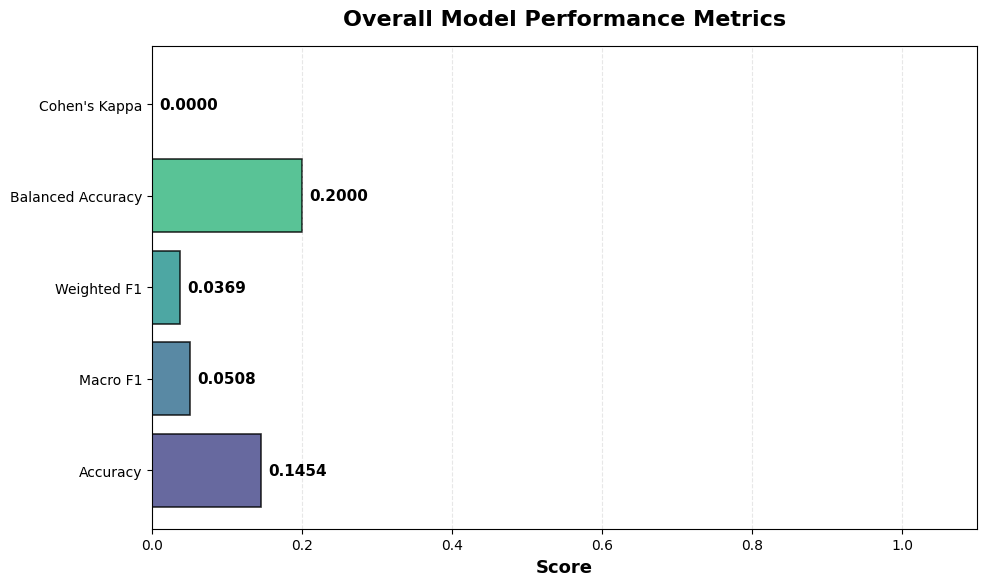

✓ Overall metrics visualization saved

Overall Metrics:
  Accuracy: 0.1454
  Macro F1: 0.0508
  Weighted F1: 0.0369
  Balanced Accuracy: 0.2000
  Cohen's Kappa: 0.0000


In [9]:
# Calculate overall metrics
overall_metrics = {
    'Accuracy': accuracy_score(all_y_true, all_y_pred),
    'Macro F1': f1_score(all_y_true, all_y_pred, average='macro', labels=STAGE_LABELS, zero_division=0),
    'Weighted F1': f1_score(all_y_true, all_y_pred, average='weighted', labels=STAGE_LABELS, zero_division=0),
    'Balanced Accuracy': balanced_accuracy_score(all_y_true, all_y_pred),
    'Cohen\'s Kappa': cohen_kappa_score(all_y_true, all_y_pred, labels=STAGE_LABELS)
}

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

metrics_names = list(overall_metrics.keys())
metrics_values = list(overall_metrics.values())
colors_gradient = plt.cm.viridis(np.linspace(0.2, 0.8, len(metrics_names)))

bars = ax.barh(metrics_names, metrics_values, color=colors_gradient, alpha=0.8, edgecolor='black', linewidth=1.2)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, metrics_values)):
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{value:.4f}', 
            va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Overall Model Performance Metrics', fontsize=16, fontweight='bold', pad=15)
ax.set_xlim(0, 1.1)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(f'{VIZ_DIR}/03_overall_metrics.png', bbox_inches='tight')
plt.show()

print("✓ Overall metrics visualization saved")
print("\nOverall Metrics:")
for metric, value in overall_metrics.items():
    print(f"  {metric}: {value:.4f}")

## 7. Visualization 4: Sleep Stage Distribution Comparison

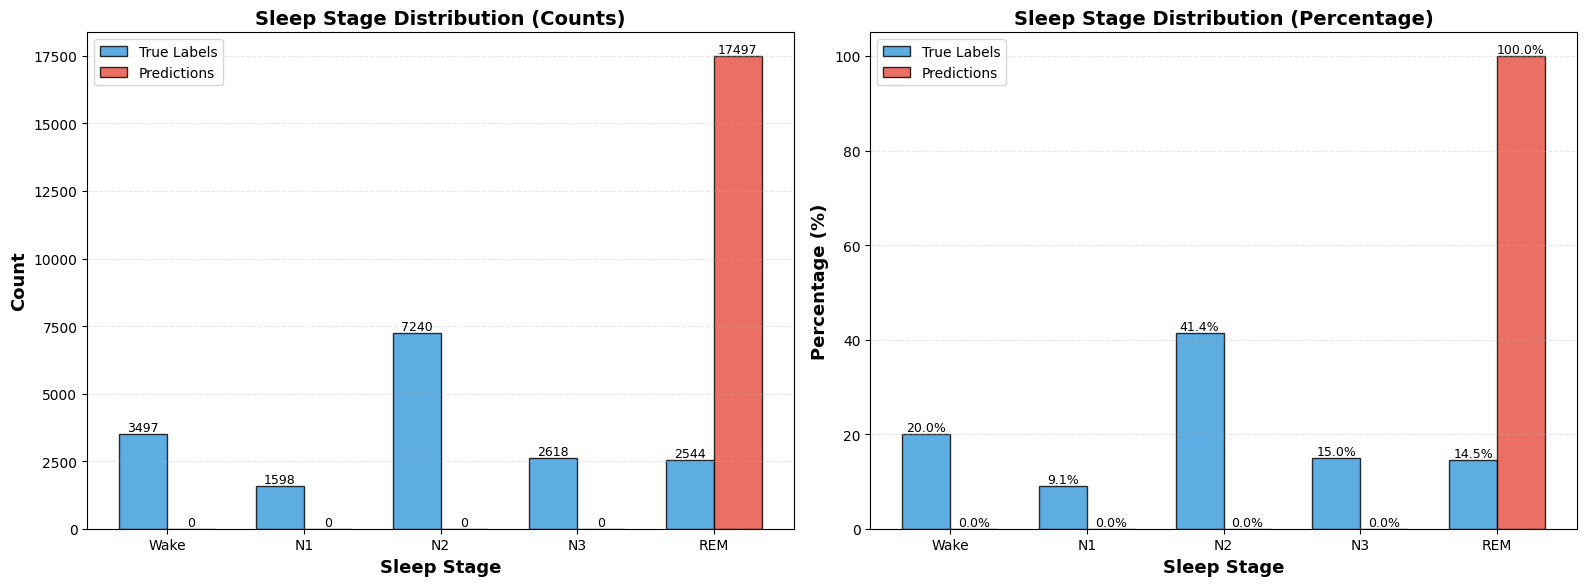

✓ Stage distribution visualization saved


In [10]:
# Calculate distributions
true_counts = [np.sum(all_y_true == i) for i in STAGE_LABELS]
pred_counts = [np.sum(all_y_pred == i) for i in STAGE_LABELS]

true_percentages = [count / len(all_y_true) * 100 for count in true_counts]
pred_percentages = [count / len(all_y_pred) * 100 for count in pred_counts]

# Create side-by-side bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(STAGE_NAMES))
width = 0.35

# Plot 1: Absolute counts
bars1 = axes[0].bar(x - width/2, true_counts, width, label='True Labels', 
                     color='#3498db', alpha=0.8, edgecolor='black')
bars2 = axes[0].bar(x + width/2, pred_counts, width, label='Predictions', 
                     color='#e74c3c', alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Sleep Stage', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=13, fontweight='bold')
axes[0].set_title('Sleep Stage Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(STAGE_NAMES)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                     f'{int(height)}',
                     ha='center', va='bottom', fontsize=9)

# Plot 2: Percentages
bars3 = axes[1].bar(x - width/2, true_percentages, width, label='True Labels', 
                     color='#3498db', alpha=0.8, edgecolor='black')
bars4 = axes[1].bar(x + width/2, pred_percentages, width, label='Predictions', 
                     color='#e74c3c', alpha=0.8, edgecolor='black')

axes[1].set_xlabel('Sleep Stage', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=13, fontweight='bold')
axes[1].set_title('Sleep Stage Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(STAGE_NAMES)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}%',
                     ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(f'{VIZ_DIR}/04_stage_distribution.png', bbox_inches='tight')
plt.show()

print("✓ Stage distribution visualization saved")

## 8. Visualization 5: Per-Patient Performance Distribution

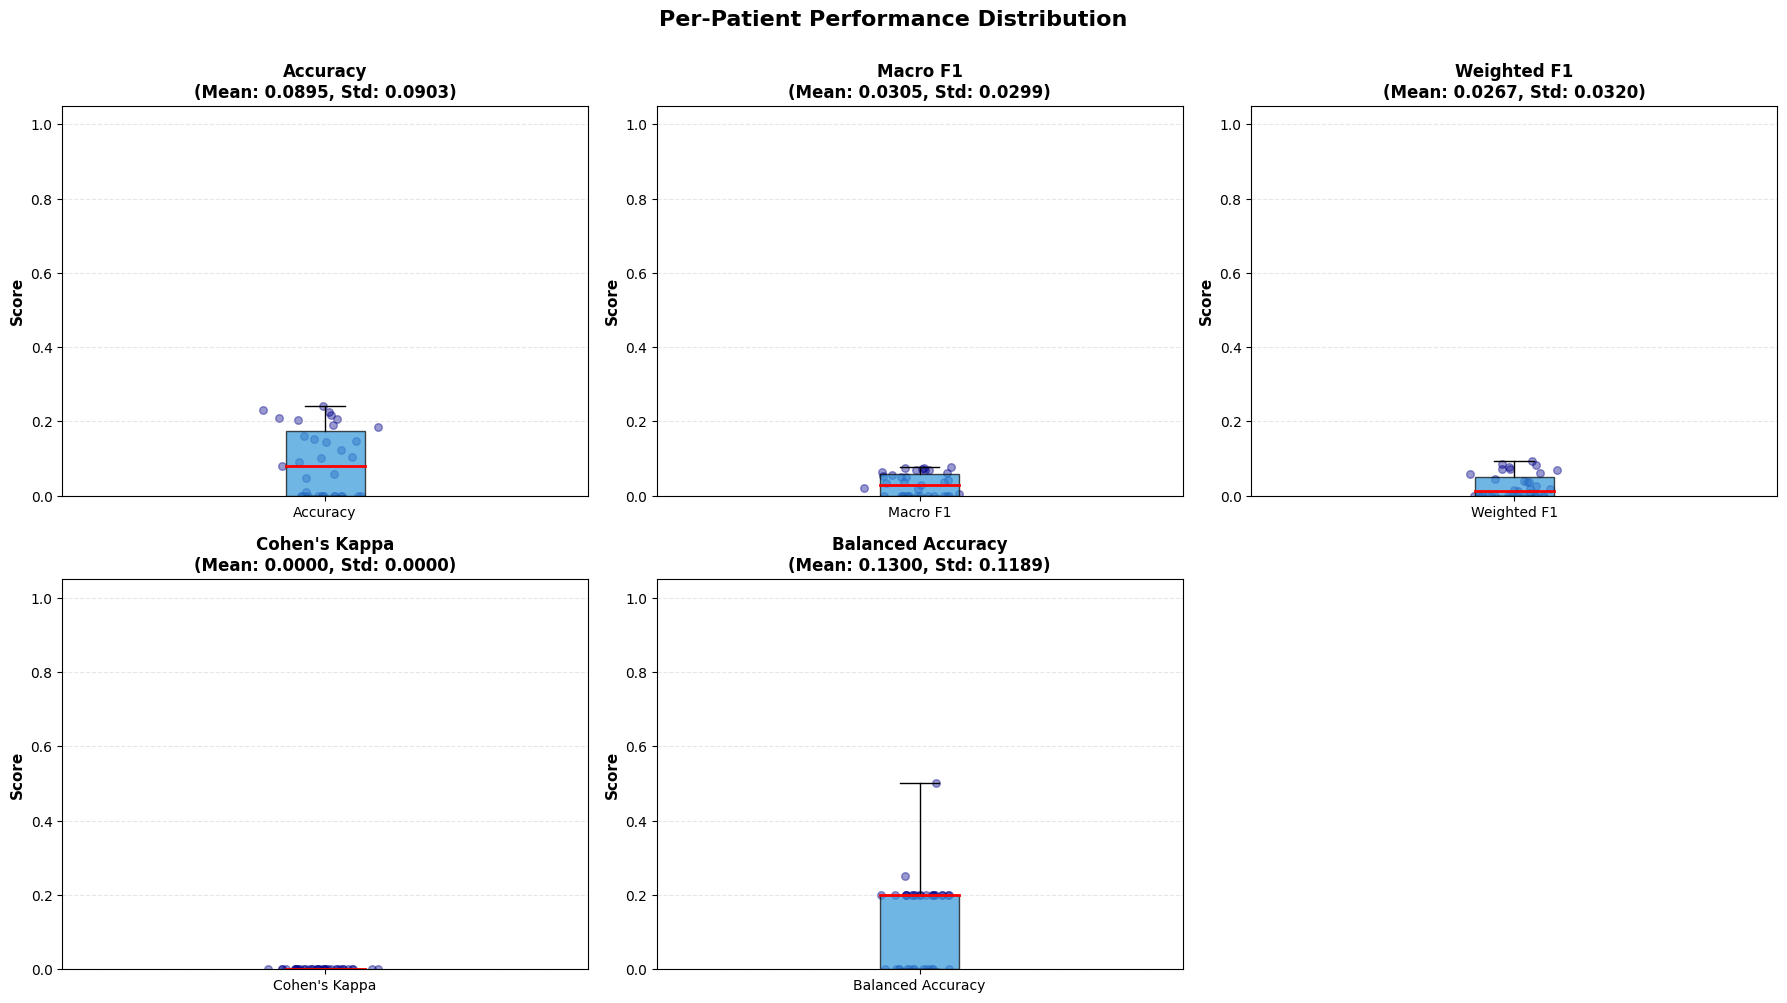

✓ Per-patient distribution visualization saved


In [11]:
# Create box plots for per-patient metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = ['accuracy', 'macro_f1', 'weighted_f1', 'kappa', 'balanced_acc']
metric_labels = ['Accuracy', 'Macro F1', 'Weighted F1', "Cohen's Kappa", 'Balanced Accuracy']

for idx, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
    if metric in df_results.columns:
        # Box plot
        bp = axes[idx].boxplot([df_results[metric]], 
                                patch_artist=True,
                                boxprops=dict(facecolor='#3498db', alpha=0.7),
                                medianprops=dict(color='red', linewidth=2),
                                whiskerprops=dict(color='black'),
                                capprops=dict(color='black'))
        
        # Add scatter points
        y = df_results[metric]
        x = np.random.normal(1, 0.04, size=len(y))
        axes[idx].scatter(x, y, alpha=0.4, s=30, color='darkblue')
        
        axes[idx].set_ylabel('Score', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'{label}\n(Mean: {df_results[metric].mean():.4f}, Std: {df_results[metric].std():.4f})', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xticks([1])
        axes[idx].set_xticklabels([label])
        axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
        axes[idx].set_ylim(0, 1.05)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Per-Patient Performance Distribution', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(f'{VIZ_DIR}/05_per_patient_distribution.png', bbox_inches='tight')
plt.show()

print("✓ Per-patient distribution visualization saved")

## 9. Visualization 6: Per-Class F1-Score Comparison

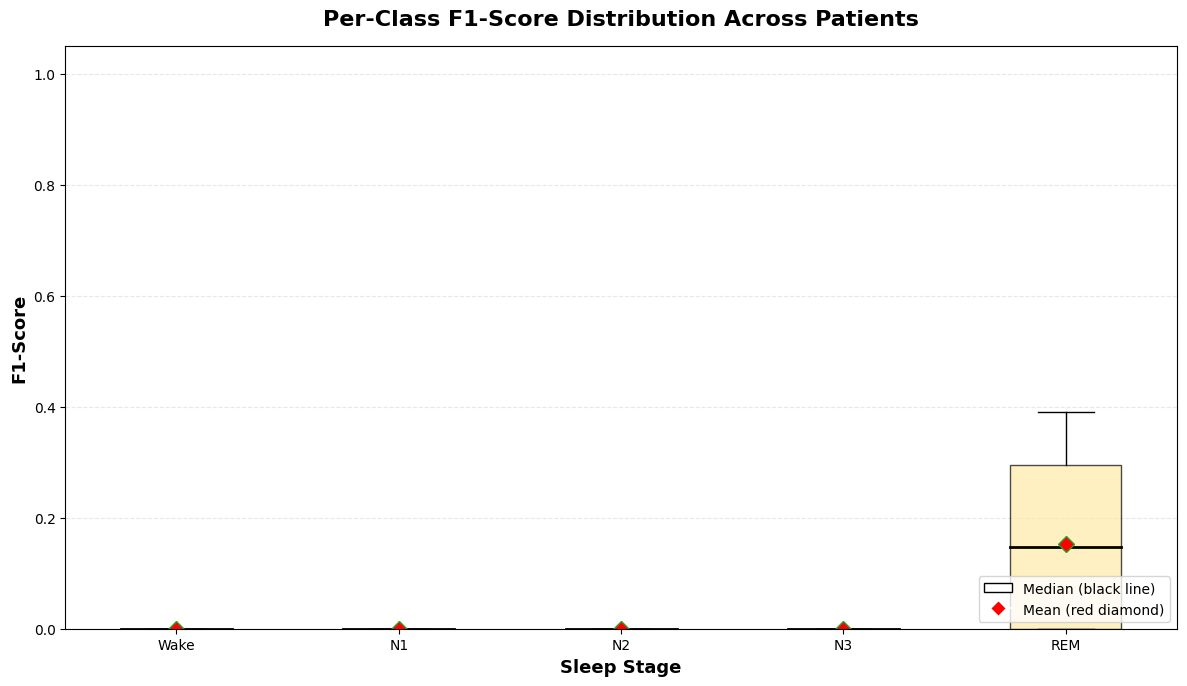

✓ Per-class F1 distribution visualization saved


In [12]:
# Extract per-class F1 scores from patient results
f1_columns = ['f1_wake', 'f1_n1', 'f1_n2', 'f1_n3', 'f1_rem']

if all(col in df_results.columns for col in f1_columns):
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Create box plot
    data_to_plot = [df_results[col].values for col in f1_columns]
    bp = ax.boxplot(data_to_plot, 
                     labels=STAGE_NAMES,
                     patch_artist=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color boxes
    for patch, color in zip(bp['boxes'], STAGE_COLORS):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Customize median lines
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)
    
    ax.set_xlabel('Sleep Stage', fontsize=13, fontweight='bold')
    ax.set_ylabel('F1-Score', fontsize=13, fontweight='bold')
    ax.set_title('Per-Class F1-Score Distribution Across Patients', fontsize=16, fontweight='bold', pad=15)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0, 1.05)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='white', edgecolor='black', label='Median (black line)'),
                       plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='red', 
                                 markersize=8, label='Mean (red diamond)')]
    ax.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.savefig(f'{VIZ_DIR}/06_per_class_f1_distribution.png', bbox_inches='tight')
    plt.show()
    
    print("✓ Per-class F1 distribution visualization saved")
else:
    print("⚠ Per-class F1 columns not found in results")

## 10. Visualization 7: Radar Chart for Overall Performance

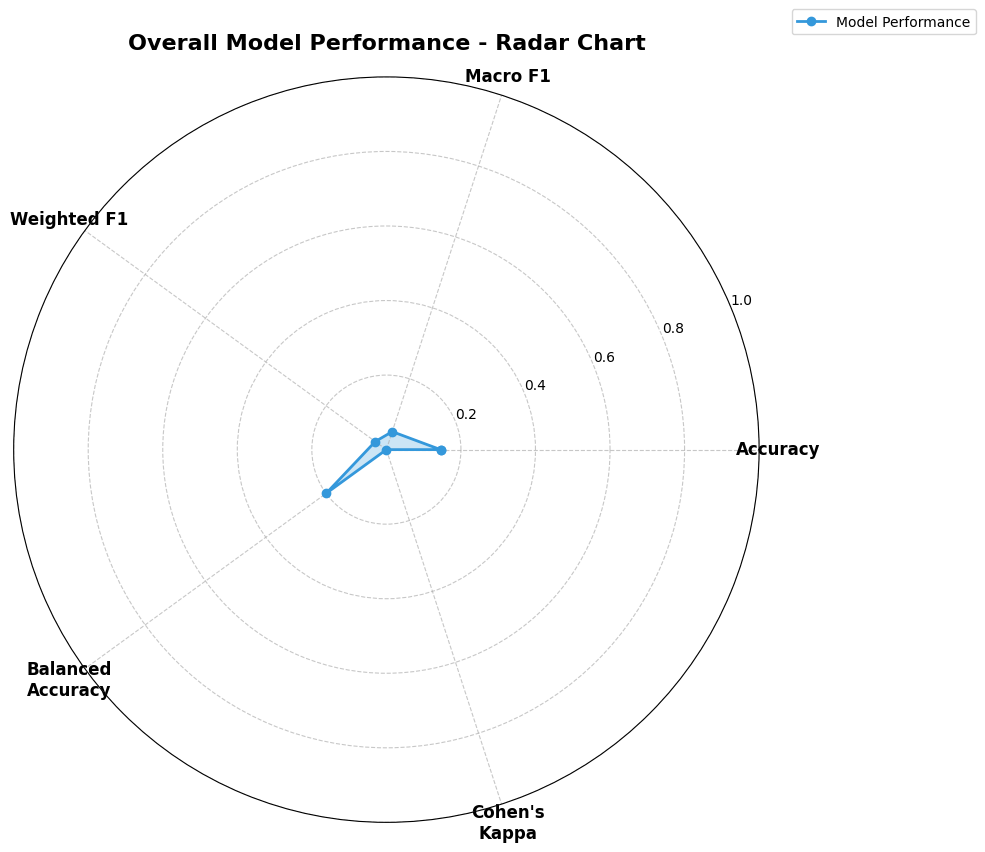

✓ Radar chart visualization saved


In [13]:
# Create radar chart for overall metrics
from math import pi

# Prepare data
categories = ['Accuracy', 'Macro F1', 'Weighted F1', 'Balanced\nAccuracy', "Cohen's\nKappa"]
values = [
    overall_metrics['Accuracy'],
    overall_metrics['Macro F1'],
    overall_metrics['Weighted F1'],
    overall_metrics['Balanced Accuracy'],
    overall_metrics['Cohen\'s Kappa']
]

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]  # Complete the circle
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data
ax.plot(angles, values, 'o-', linewidth=2, color='#3498db', label='Model Performance')
ax.fill(angles, values, alpha=0.25, color='#3498db')

# Fix axis to go in the right order
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Set y-axis limits
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add title
plt.title('Overall Model Performance - Radar Chart', 
          fontsize=16, fontweight='bold', pad=20)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.savefig(f'{VIZ_DIR}/07_radar_chart.png', bbox_inches='tight')
plt.show()

print("✓ Radar chart visualization saved")

## 11. Visualization 8: Heatmap of Per-Patient Metrics

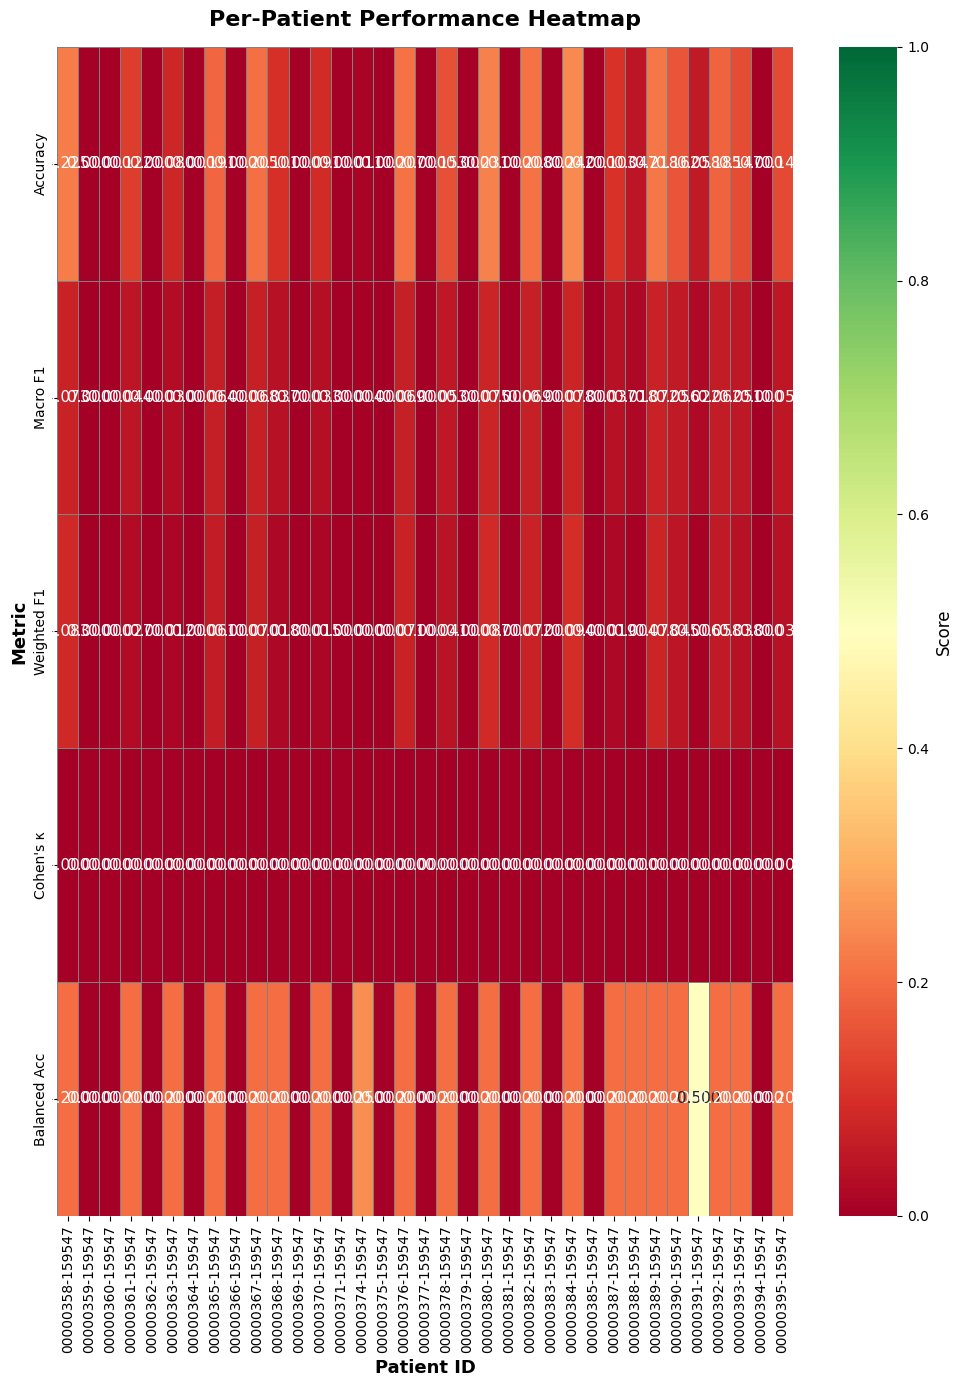

✓ Per-patient heatmap visualization saved


In [14]:
# Create heatmap of per-patient performance
if len(df_results) > 0:
    # Select relevant columns
    heatmap_cols = ['accuracy', 'macro_f1', 'weighted_f1', 'kappa', 'balanced_acc']
    heatmap_data = df_results[['patient_id'] + heatmap_cols].set_index('patient_id')
    
    # Rename columns for better display
    heatmap_data.columns = ['Accuracy', 'Macro F1', 'Weighted F1', "Cohen's κ", 'Balanced Acc']
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(10, max(8, len(df_results) * 0.4)))
    
    sns.heatmap(heatmap_data.T, annot=True, fmt='.3f', cmap='RdYlGn', 
                cbar_kws={'label': 'Score'}, ax=ax,
                linewidths=0.5, linecolor='gray', vmin=0, vmax=1)
    
    ax.set_title('Per-Patient Performance Heatmap', fontsize=16, fontweight='bold', pad=15)
    ax.set_xlabel('Patient ID', fontsize=13, fontweight='bold')
    ax.set_ylabel('Metric', fontsize=13, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{VIZ_DIR}/08_per_patient_heatmap.png', bbox_inches='tight')
    plt.show()
    
    print("✓ Per-patient heatmap visualization saved")
else:
    print("⚠ No patient results available for heatmap")

## 12. Summary Statistics Table

In [15]:
# Create summary statistics table
print("="*80)
print("EVALUATION SUMMARY")
print("="*80)
print(f"\nTotal Patients: {len(df_results)}")
print(f"Total Epochs: {len(all_y_true)}")
print(f"\nOverall Performance:")
for metric, value in overall_metrics.items():
    print(f"  {metric:20s}: {value:.4f}")

print(f"\n{'='*80}")
print("Per-Class Performance:")
print(f"{'='*80}")
print(metrics_df.to_string(index=False))

print(f"\n{'='*80}")
print("Per-Patient Statistics:")
print(f"{'='*80}")
print(df_results[metrics_to_plot].describe())

print(f"\n✓ All visualizations saved to: {VIZ_DIR}")
print("\nGenerated files:")
for i, filename in enumerate(sorted(os.listdir(VIZ_DIR)), 1):
    print(f"  {i}. {filename}")

EVALUATION SUMMARY

Total Patients: 35
Total Epochs: 17497

Overall Performance:
  Accuracy            : 0.1454
  Macro F1            : 0.0508
  Weighted F1         : 0.0369
  Balanced Accuracy   : 0.2000
  Cohen's Kappa       : 0.0000

Per-Class Performance:
Stage  Precision  Recall  F1-Score
 Wake   0.000000     0.0   0.00000
   N1   0.000000     0.0   0.00000
   N2   0.000000     0.0   0.00000
   N3   0.000000     0.0   0.00000
  REM   0.145396     1.0   0.25388

Per-Patient Statistics:
        accuracy   macro_f1  weighted_f1  kappa  balanced_acc
count  35.000000  35.000000    35.000000   35.0     35.000000
mean    0.089506   0.030453     0.026746    0.0      0.130000
std     0.090315   0.029938     0.032010    0.0      0.118941
min     0.000000   0.000000     0.000000    0.0      0.000000
25%     0.000000   0.000000     0.000000    0.0      0.000000
50%     0.079677   0.029519     0.011760    0.0      0.200000
75%     0.173621   0.059142     0.051531    0.0      0.200000
max     0

## 13. Export Summary Report

In [16]:
# Create a comprehensive summary report
report_path = f'{VIZ_DIR}/evaluation_report.txt'

with open(report_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("SLEEP STAGE CLASSIFICATION - EVALUATION REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Generated: 2026-02-16\n")
    f.write(f"Checkpoint: {CHECKPOINT_PATH}\n")
    f.write(f"Data Directory: {OUTPUT_DIR}\n\n")
    
    f.write(f"Total Patients: {len(df_results)}\n")
    f.write(f"Total Epochs: {len(all_y_true)}\n\n")
    
    f.write("="*80 + "\n")
    f.write("OVERALL PERFORMANCE METRICS\n")
    f.write("="*80 + "\n\n")
    for metric, value in overall_metrics.items():
        f.write(f"{metric:25s}: {value:.4f}\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("PER-CLASS PERFORMANCE\n")
    f.write("="*80 + "\n\n")
    f.write(metrics_df.to_string(index=False))
    
    f.write("\n\n" + "="*80 + "\n")
    f.write("SLEEP STAGE DISTRIBUTION\n")
    f.write("="*80 + "\n\n")
    f.write(f"{'Stage':<10} {'True Count':<15} {'True %':<12} {'Pred Count':<15} {'Pred %':<12}\n")
    f.write("-"*80 + "\n")
    for i, stage in enumerate(STAGE_NAMES):
        f.write(f"{stage:<10} {true_counts[i]:<15} {true_percentages[i]:<12.2f} {pred_counts[i]:<15} {pred_percentages[i]:<12.2f}\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("VISUALIZATIONS GENERATED\n")
    f.write("="*80 + "\n\n")
    for i, filename in enumerate(sorted(os.listdir(VIZ_DIR)), 1):
        if filename.endswith('.png'):
            f.write(f"{i}. {filename}\n")

print(f"✓ Summary report saved to: {report_path}")
print("\n" + "="*80)
print("ALL VISUALIZATIONS COMPLETED SUCCESSFULLY!")
print("="*80)

✓ Summary report saved to: ./visualizations/evaluation_report.txt

ALL VISUALIZATIONS COMPLETED SUCCESSFULLY!
